# Square Network

In this notebook, there is code representation of an Square Network (Lattice) where each node has at most four neighbors. The network is initialized with $height$ and $width$ measures, where the total number of node is $height * width$.

## Libraries

First, we import some important libraries. Here, we export a library known as Networkx to simplify the procedures. See the following link for references [Networkx Documentation](https://networkx.github.io/documentation/stable/tutorial.html)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

We defined the class node with the attributes needed to the used dynamic. However, if there are few attributes, it could be better to define the attributes in the addition of a new node.

In [3]:
class Node():
  def __init__(self, state = 0):
    #Here we can some attributes than can be useful according to the used dynamic
    self.state = state

  #Function to describe the class when I call an object with print 
  def __str__(self):
    return "state={0}".format(self.state)

  #Function to describe the class when I call an object of this class in the prompt
  def __repr__(self):
    return "<Node: state={0}>".format(self.state)

Then, we defined the a network class. This class inherits of the Graph class of Networkx library. We use this library for access to functions that facilitates network operations. These could be used in future implementation for control the dynamic of the network.

In [4]:

class SquareNetwork(nx.Graph):
  def __init__(self, height, width ):
    """Define a square network with height x width nodes.
    """
    self.height = height
    self.width = width
    nx.Graph.__init__(self)  #import the attributes of the super class
    self.__create_graph()

  #Create the graph of the network given a height and width value
  def __create_graph(self):
    """Create a square graph with heigh x width nodes.
    """
    if (self.height < 2 or self.width < 2):
      print("INCORRECT: Set values of height or width >= 2")
      return

    self.clear() # Remove all the nodes and edges of the last graph
    current_node = 0
    for i in range(self.width):
      for j in range(self.height):  

          self.__adding_edges(i,j,current_node)

          #Adding neighbors to each node
          #Adding the node to the network
          #NOTE: Here if there are few attributes in a node, we can defined
          #the attributes in this part. So, we will use state=0 instead 
          #of data=node
          self.add_node(current_node, pos=(i,j)) 
          current_node +=1

  #Function to define the neihbors per node
  def __adding_edges(self,i,j,current_node):
    """Defines the neighbors of the current node"""
    #There are four possible connection
    directions = {
        "up" : current_node + 1,
        "down" : current_node - 1,
        "left" : current_node - self.height,
        "right" : current_node + self.height
    }

    #For border cases of the network, we have to pop some connections
    if i == 0:
      directions.pop("left")
    if i == self.width - 1:
      directions.pop("right")
    if j == 0:
      directions.pop("down")
    if j == self.height - 1:
      directions.pop("up")

    for _, neighbor in directions.items():
      self.add_edge(current_node, neighbor)


  #Function to plot the structure of the network
  def draw_network(self,node_color='blue', node_size=25, with_labels=False):
    """
    Draw the graph in a circular mode.
        
    node_size: the size of all the nodes
    node_color: the colo of all the nodes
    with_labels: True or False to show the ids of the nodes
    """
    pos = nx.get_node_attributes(self, 'pos')
    nx.draw(self, pos, node_color=node_color, node_size=node_size, with_labels=with_labels)
    plt.draw()
    plt.show()

Creating a network a plotting the topology

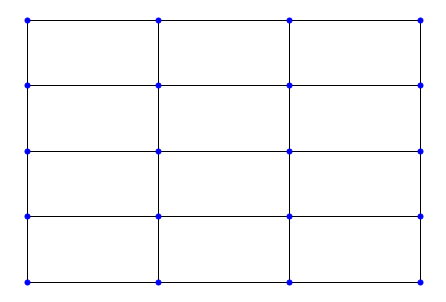

In [5]:
G = SquareNetwork(height=5,width=4)
G.draw_network()

Check the nodes and edges of the graph. Also check the attributes of each node.

In [ ]:
#Check nodes and edges
print(list(G.nodes))
print(list(G.edges))


#Check nodes' attributes
nodes_attributes = nx.get_node_attributes(G,'data')

for k,v in nodes_attributes.items():
  print("Node {0} with state {1}".format(k, v.state))

#Check nodes' neighbors
for node, neighbors in G.adj.items():
  print("Node {0} and neighbors: {1}".format(node, list(neighbors)))


[0, 1, 5, 2, 6, 3, 7, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[(0, 1), (0, 5), (1, 2), (1, 6), (5, 6), (5, 10), (2, 3), (2, 7), (6, 7), (6, 11), (3, 4), (3, 8), (7, 8), (7, 12), (4, 9), (8, 9), (8, 13), (9, 14), (10, 11), (10, 15), (11, 12), (11, 16), (12, 13), (12, 17), (13, 14), (13, 18), (14, 19), (15, 16), (16, 17), (17, 18), (18, 19)]
Node 0 with state 0
Node 1 with state 0
Node 5 with state 0
Node 2 with state 0
Node 6 with state 0
Node 3 with state 0
Node 7 with state 0
Node 4 with state 0
Node 8 with state 0
Node 9 with state 0
Node 10 with state 0
Node 11 with state 0
Node 12 with state 0
Node 13 with state 0
Node 14 with state 0
Node 15 with state 0
Node 16 with state 0
Node 17 with state 0
Node 18 with state 0
Node 19 with state 0
Node 0 and neighbors: [1, 5]
Node 1 and neighbors: [0, 2, 6]
Node 5 and neighbors: [0, 6, 10]
Node 2 and neighbors: [1, 3, 7]
Node 6 and neighbors: [1, 5, 7, 11]
Node 3 and neighbors: [2, 4, 8]
Node 7 and neighbors: [2, 6, 8, 12]
Node 4 an